In [1]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


In [2]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding
from collections import Counter
import time
import progressbar as pb
from tqdm import tqdm
import tensorflow as tf
import os
import shutil
from empyrical import sortino_ratio, calmar_ratio, omega_ratio
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy
from stable_baselines.common.vec_env import SubprocVecEnv, VecEnv, VecEnvWrapper
from stable_baselines import A2C, PPO2
from stable_baselines.common.vec_env import DummyVecEnv

from trading_env import TradingEnv

In [3]:
# load the market data
input_source = np.load(open('data_eurusd.npy','rb'))
to_predict = np.load(open('data_eurusd_targets.npy','rb'))

to_predict = to_predict[3,:].reshape(-1)

input_source = input_source.T

In [4]:
is_orig = np.copy(input_source)
cp = int(0.8*len(input_source))
test_input_source = input_source[cp:, :]
test_to_predict = to_predict[cp:]
input_source = input_source[0:cp, :]
to_predict = to_predict[0:cp]

In [5]:
bars_per_episode = 1000
winlen = 10
traded_amt = 100000
initial_balance = 10000
commission = 0
slippage = 0.0#001

In [6]:
# multiprocess environment
#n_cpu = 16
#env = SubprocVecEnv([lambda: TradingEnv() for i in range(n_cpu)])
env = TradingEnv(input_source, to_predict,
                 winlen=winlen, bars_per_episode=bars_per_episode, traded_amt=traded_amt, initial_balance=initial_balance,
                 commission=commission, slippage=slippage
                 )
env = DummyVecEnv([lambda: env])
# Custom MLP policy of two layers of size 32 each with tanh activation function
policy_kwargs = dict(act_fun=tf.nn.relu, net_arch=[128, 128])

t = 0
#[shutil.rmtree('/home/peter/tblog/'+x) for x in os.listdir('/home/peter/tblog/') if x]
model = A2C(MlpPolicy, env, 
            policy_kwargs=policy_kwargs, 
            learning_rate=0.00035,
            verbose=1, tensorboard_log='/home/peter/tblog')

W0710 23:46:24.988882 140021413713728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/tf_util.py:98: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0710 23:46:24.989535 140021413713728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/tf_util.py:107: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0710 23:46:24.997395 140021413713728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/policies.py:114: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0710 23:46:24.998459 140021413713728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/input.py:25: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 23:46:25.000661 140021413713728 deprecation.py:323] From /u

In [7]:
try:
    model.learn(total_timesteps=1_000_000)
    model.save("a2c_trading")
except KeyboardInterrupt:
    pass

W0710 23:46:25.663629 140021413713728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/base_class.py:830: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



---------------------------------
| explained_variance | -0.0959  |
| fps                | 33       |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 972      |
---------------------------------
---------------------------------
| explained_variance | 0.0034   |
| fps                | 933      |
| nupdates           | 100      |
| policy_entropy     | 1.1      |
| total_timesteps    | 500      |
| value_loss         | 2.11e+03 |
---------------------------------
---------------------------------
| explained_variance | -1.35    |
| fps                | 1082     |
| nupdates           | 200      |
| policy_entropy     | 1.1      |
| total_timesteps    | 1000     |
| value_loss         | 4.29     |
---------------------------------
---------------------------------
| explained_variance | 0.149    |
| fps                | 1134     |
| nupdates           | 300      |
| policy_entropy     | 1.1      |
| total_timest

---------------------------------
| explained_variance | -0.0373  |
| fps                | 1138     |
| nupdates           | 3100     |
| policy_entropy     | 1.03     |
| total_timesteps    | 15500    |
| value_loss         | 1.06e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00897 |
| fps                | 1136     |
| nupdates           | 3200     |
| policy_entropy     | 1.06     |
| total_timesteps    | 16000    |
| value_loss         | 428      |
---------------------------------
---------------------------------
| explained_variance | 0.0201   |
| fps                | 1134     |
| nupdates           | 3300     |
| policy_entropy     | 1.06     |
| total_timesteps    | 16500    |
| value_loss         | 7.83e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.062   |
| fps                | 1133     |
| nupdates           | 3400     |
| policy_entropy     | 1.03     |
| total_timest

---------------------------------
| explained_variance | -114     |
| fps                | 1112     |
| nupdates           | 6200     |
| policy_entropy     | 1.04     |
| total_timesteps    | 31000    |
| value_loss         | 0.0585   |
---------------------------------
---------------------------------
| explained_variance | -0.0438  |
| fps                | 1112     |
| nupdates           | 6300     |
| policy_entropy     | 0.954    |
| total_timesteps    | 31500    |
| value_loss         | 582      |
---------------------------------
---------------------------------
| explained_variance | 0.00404  |
| fps                | 1111     |
| nupdates           | 6400     |
| policy_entropy     | 1.08     |
| total_timesteps    | 32000    |
| value_loss         | 124      |
---------------------------------
---------------------------------
| explained_variance | 0.155    |
| fps                | 1111     |
| nupdates           | 6500     |
| policy_entropy     | 1.05     |
| total_timest

---------------------------------
| explained_variance | -420     |
| fps                | 1099     |
| nupdates           | 9300     |
| policy_entropy     | 0.958    |
| total_timesteps    | 46500    |
| value_loss         | 0.0539   |
---------------------------------
---------------------------------
| explained_variance | -614     |
| fps                | 1097     |
| nupdates           | 9400     |
| policy_entropy     | 0.897    |
| total_timesteps    | 47000    |
| value_loss         | 0.00904  |
---------------------------------
---------------------------------
| explained_variance | 0.00661  |
| fps                | 1097     |
| nupdates           | 9500     |
| policy_entropy     | 0.779    |
| total_timesteps    | 47500    |
| value_loss         | 134      |
---------------------------------
----------------------------------
| explained_variance | -2.19e+05 |
| fps                | 1097      |
| nupdates           | 9600      |
| policy_entropy     | 0.969     |
| total_t

---------------------------------
| explained_variance | 0.135    |
| fps                | 1094     |
| nupdates           | 12400    |
| policy_entropy     | 0.728    |
| total_timesteps    | 62000    |
| value_loss         | 67.1     |
---------------------------------
---------------------------------
| explained_variance | -3.27    |
| fps                | 1094     |
| nupdates           | 12500    |
| policy_entropy     | 0.693    |
| total_timesteps    | 62500    |
| value_loss         | 247      |
---------------------------------
---------------------------------
| explained_variance | 0.0772   |
| fps                | 1094     |
| nupdates           | 12600    |
| policy_entropy     | 0.00215  |
| total_timesteps    | 63000    |
| value_loss         | 9.9e+04  |
---------------------------------
---------------------------------
| explained_variance | -1.95    |
| fps                | 1094     |
| nupdates           | 12700    |
| policy_entropy     | 0.618    |
| total_timest

---------------------------------
| explained_variance | -0.057   |
| fps                | 1093     |
| nupdates           | 15500    |
| policy_entropy     | 0.62     |
| total_timesteps    | 77500    |
| value_loss         | 4.9e+05  |
---------------------------------
---------------------------------
| explained_variance | -0.00168 |
| fps                | 1092     |
| nupdates           | 15600    |
| policy_entropy     | 0.0724   |
| total_timesteps    | 78000    |
| value_loss         | 1.9e+04  |
---------------------------------
---------------------------------
| explained_variance | 0.0627   |
| fps                | 1091     |
| nupdates           | 15700    |
| policy_entropy     | 0.0174   |
| total_timesteps    | 78500    |
| value_loss         | 1.75e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.034    |
| fps                | 1091     |
| nupdates           | 15800    |
| policy_entropy     | 0.328    |
| total_timest

---------------------------------
| explained_variance | -51.8    |
| fps                | 1091     |
| nupdates           | 18600    |
| policy_entropy     | 0.415    |
| total_timesteps    | 93000    |
| value_loss         | 580      |
---------------------------------
---------------------------------
| explained_variance | 0.134    |
| fps                | 1091     |
| nupdates           | 18700    |
| policy_entropy     | 0.143    |
| total_timesteps    | 93500    |
| value_loss         | 5.37e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.131    |
| fps                | 1091     |
| nupdates           | 18800    |
| policy_entropy     | 0.83     |
| total_timesteps    | 94000    |
| value_loss         | 1e+03    |
---------------------------------
---------------------------------
| explained_variance | 0.0418   |
| fps                | 1092     |
| nupdates           | 18900    |
| policy_entropy     | 0.0858   |
| total_timest

---------------------------------
| explained_variance | 0.00121  |
| fps                | 1091     |
| nupdates           | 21700    |
| policy_entropy     | 0.682    |
| total_timesteps    | 108500   |
| value_loss         | 2.97e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00594 |
| fps                | 1091     |
| nupdates           | 21800    |
| policy_entropy     | 0.296    |
| total_timesteps    | 109000   |
| value_loss         | 2.84e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00522 |
| fps                | 1090     |
| nupdates           | 21900    |
| policy_entropy     | 0.804    |
| total_timesteps    | 109500   |
| value_loss         | 1.51e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0391   |
| fps                | 1089     |
| nupdates           | 22000    |
| policy_entropy     | 0.996    |
| total_timest

---------------------------------
| explained_variance | -0.0598  |
| fps                | 1088     |
| nupdates           | 24800    |
| policy_entropy     | 0.371    |
| total_timesteps    | 124000   |
| value_loss         | 1.05e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.289   |
| fps                | 1088     |
| nupdates           | 24900    |
| policy_entropy     | 0.305    |
| total_timesteps    | 124500   |
| value_loss         | 1.05e+04 |
---------------------------------
---------------------------------
| explained_variance | -65.1    |
| fps                | 1087     |
| nupdates           | 25000    |
| policy_entropy     | 0.652    |
| total_timesteps    | 125000   |
| value_loss         | 0.0744   |
---------------------------------
---------------------------------
| explained_variance | -0.208   |
| fps                | 1087     |
| nupdates           | 25100    |
| policy_entropy     | 0.153    |
| total_timest

---------------------------------
| explained_variance | 0.0533   |
| fps                | 1068     |
| nupdates           | 27900    |
| policy_entropy     | 0.267    |
| total_timesteps    | 139500   |
| value_loss         | 69.7     |
---------------------------------
---------------------------------
| explained_variance | -10.6    |
| fps                | 1064     |
| nupdates           | 28000    |
| policy_entropy     | 0.114    |
| total_timesteps    | 140000   |
| value_loss         | 0.471    |
---------------------------------
---------------------------------
| explained_variance | -64.2    |
| fps                | 1060     |
| nupdates           | 28100    |
| policy_entropy     | 0.0681   |
| total_timesteps    | 140500   |
| value_loss         | 0.855    |
---------------------------------
---------------------------------
| explained_variance | -47.5    |
| fps                | 1059     |
| nupdates           | 28200    |
| policy_entropy     | 0.186    |
| total_timest

---------------------------------
| explained_variance | 0.0389   |
| fps                | 1042     |
| nupdates           | 31000    |
| policy_entropy     | 0.912    |
| total_timesteps    | 155000   |
| value_loss         | 18.3     |
---------------------------------
---------------------------------
| explained_variance | -0.207   |
| fps                | 1042     |
| nupdates           | 31100    |
| policy_entropy     | 0.763    |
| total_timesteps    | 155500   |
| value_loss         | 171      |
---------------------------------
---------------------------------
| explained_variance | -0.041   |
| fps                | 1042     |
| nupdates           | 31200    |
| policy_entropy     | 0.613    |
| total_timesteps    | 156000   |
| value_loss         | 131      |
---------------------------------
---------------------------------
| explained_variance | -32.3    |
| fps                | 1042     |
| nupdates           | 31300    |
| policy_entropy     | 0.595    |
| total_timest

---------------------------------
| explained_variance | -0.00217 |
| fps                | 1042     |
| nupdates           | 34100    |
| policy_entropy     | 0.89     |
| total_timesteps    | 170500   |
| value_loss         | 842      |
---------------------------------
---------------------------------
| explained_variance | -0.177   |
| fps                | 1042     |
| nupdates           | 34200    |
| policy_entropy     | 0.629    |
| total_timesteps    | 171000   |
| value_loss         | 394      |
---------------------------------
---------------------------------
| explained_variance | -0.0316  |
| fps                | 1042     |
| nupdates           | 34300    |
| policy_entropy     | 0.438    |
| total_timesteps    | 171500   |
| value_loss         | 2.89e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.13     |
| fps                | 1042     |
| nupdates           | 34400    |
| policy_entropy     | 0.395    |
| total_timest

----------------------------------
| explained_variance | -0.000543 |
| fps                | 1036      |
| nupdates           | 37200     |
| policy_entropy     | 0.832     |
| total_timesteps    | 186000    |
| value_loss         | 8.34e+03  |
----------------------------------
---------------------------------
| explained_variance | -0.0138  |
| fps                | 1037     |
| nupdates           | 37300    |
| policy_entropy     | 0.591    |
| total_timesteps    | 186500   |
| value_loss         | 582      |
---------------------------------
---------------------------------
| explained_variance | 0.0299   |
| fps                | 1036     |
| nupdates           | 37400    |
| policy_entropy     | 0.825    |
| total_timesteps    | 187000   |
| value_loss         | 16.8     |
---------------------------------
---------------------------------
| explained_variance | 0.00109  |
| fps                | 1036     |
| nupdates           | 37500    |
| policy_entropy     | 0.481    |
| tota

---------------------------------
| explained_variance | -64.8    |
| fps                | 1033     |
| nupdates           | 40300    |
| policy_entropy     | 0.509    |
| total_timesteps    | 201500   |
| value_loss         | 0.0142   |
---------------------------------
---------------------------------
| explained_variance | -44.1    |
| fps                | 1033     |
| nupdates           | 40400    |
| policy_entropy     | 0.94     |
| total_timesteps    | 202000   |
| value_loss         | 0.0231   |
---------------------------------
---------------------------------
| explained_variance | -15.8    |
| fps                | 1033     |
| nupdates           | 40500    |
| policy_entropy     | 0.498    |
| total_timesteps    | 202500   |
| value_loss         | 0.00497  |
---------------------------------
---------------------------------
| explained_variance | -70      |
| fps                | 1033     |
| nupdates           | 40600    |
| policy_entropy     | 0.695    |
| total_timest

---------------------------------
| explained_variance | -0.0118  |
| fps                | 1035     |
| nupdates           | 43400    |
| policy_entropy     | 0.588    |
| total_timesteps    | 217000   |
| value_loss         | 1.02e+03 |
---------------------------------
---------------------------------
| explained_variance | -51.4    |
| fps                | 1034     |
| nupdates           | 43500    |
| policy_entropy     | 0.854    |
| total_timesteps    | 217500   |
| value_loss         | 0.0179   |
---------------------------------
---------------------------------
| explained_variance | 0.313    |
| fps                | 1035     |
| nupdates           | 43600    |
| policy_entropy     | 0.44     |
| total_timesteps    | 218000   |
| value_loss         | 3.1      |
---------------------------------
---------------------------------
| explained_variance | -19.1    |
| fps                | 1035     |
| nupdates           | 43700    |
| policy_entropy     | 0.653    |
| total_timest

---------------------------------
| explained_variance | -114     |
| fps                | 1037     |
| nupdates           | 46500    |
| policy_entropy     | 0.554    |
| total_timesteps    | 232500   |
| value_loss         | 34.7     |
---------------------------------
---------------------------------
| explained_variance | -0.024   |
| fps                | 1037     |
| nupdates           | 46600    |
| policy_entropy     | 0.349    |
| total_timesteps    | 233000   |
| value_loss         | 0.339    |
---------------------------------
---------------------------------
| explained_variance | -0.104   |
| fps                | 1038     |
| nupdates           | 46700    |
| policy_entropy     | 0.311    |
| total_timesteps    | 233500   |
| value_loss         | 4.18     |
---------------------------------
---------------------------------
| explained_variance | -437     |
| fps                | 1038     |
| nupdates           | 46800    |
| policy_entropy     | 0.0144   |
| total_timest

---------------------------------
| explained_variance | -0.00745 |
| fps                | 1039     |
| nupdates           | 49600    |
| policy_entropy     | 0.928    |
| total_timesteps    | 248000   |
| value_loss         | 39.9     |
---------------------------------
---------------------------------
| explained_variance | -56      |
| fps                | 1039     |
| nupdates           | 49700    |
| policy_entropy     | 0.672    |
| total_timesteps    | 248500   |
| value_loss         | 0.0281   |
---------------------------------
---------------------------------
| explained_variance | -59      |
| fps                | 1039     |
| nupdates           | 49800    |
| policy_entropy     | 0.933    |
| total_timesteps    | 249000   |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | -0.242   |
| fps                | 1039     |
| nupdates           | 49900    |
| policy_entropy     | 0.381    |
| total_timest

---------------------------------
| explained_variance | 0.00124  |
| fps                | 1041     |
| nupdates           | 52700    |
| policy_entropy     | 0.94     |
| total_timesteps    | 263500   |
| value_loss         | 1.24e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00141  |
| fps                | 1041     |
| nupdates           | 52800    |
| policy_entropy     | 0.757    |
| total_timesteps    | 264000   |
| value_loss         | 65.4     |
---------------------------------
---------------------------------
| explained_variance | 0.402    |
| fps                | 1041     |
| nupdates           | 52900    |
| policy_entropy     | 0.663    |
| total_timesteps    | 264500   |
| value_loss         | 55.2     |
---------------------------------
---------------------------------
| explained_variance | -0.0019  |
| fps                | 1041     |
| nupdates           | 53000    |
| policy_entropy     | 0.95     |
| total_timest

---------------------------------
| explained_variance | 0.0616   |
| fps                | 1042     |
| nupdates           | 55800    |
| policy_entropy     | 0.555    |
| total_timesteps    | 279000   |
| value_loss         | 733      |
---------------------------------
---------------------------------
| explained_variance | -0.00907 |
| fps                | 1042     |
| nupdates           | 55900    |
| policy_entropy     | 0.865    |
| total_timesteps    | 279500   |
| value_loss         | 195      |
---------------------------------
---------------------------------
| explained_variance | -0.658   |
| fps                | 1042     |
| nupdates           | 56000    |
| policy_entropy     | 0.366    |
| total_timesteps    | 280000   |
| value_loss         | 316      |
---------------------------------
---------------------------------
| explained_variance | -0.323   |
| fps                | 1042     |
| nupdates           | 56100    |
| policy_entropy     | 0.00109  |
| total_timest

---------------------------------
| explained_variance | -23      |
| fps                | 1043     |
| nupdates           | 58900    |
| policy_entropy     | 0.338    |
| total_timesteps    | 294500   |
| value_loss         | 0.146    |
---------------------------------
---------------------------------
| explained_variance | -23.7    |
| fps                | 1043     |
| nupdates           | 59000    |
| policy_entropy     | 0.147    |
| total_timesteps    | 295000   |
| value_loss         | 0.014    |
---------------------------------
---------------------------------
| explained_variance | -36      |
| fps                | 1043     |
| nupdates           | 59100    |
| policy_entropy     | 0.37     |
| total_timesteps    | 295500   |
| value_loss         | 51.3     |
---------------------------------
---------------------------------
| explained_variance | -0.464   |
| fps                | 1044     |
| nupdates           | 59200    |
| policy_entropy     | 0.00203  |
| total_timest

---------------------------------
| explained_variance | -8.34    |
| fps                | 1045     |
| nupdates           | 62000    |
| policy_entropy     | 0.467    |
| total_timesteps    | 310000   |
| value_loss         | 0.0849   |
---------------------------------
---------------------------------
| explained_variance | -0.0437  |
| fps                | 1045     |
| nupdates           | 62100    |
| policy_entropy     | 0.829    |
| total_timesteps    | 310500   |
| value_loss         | 6.04     |
---------------------------------
---------------------------------
| explained_variance | -0.174   |
| fps                | 1045     |
| nupdates           | 62200    |
| policy_entropy     | 0.77     |
| total_timesteps    | 311000   |
| value_loss         | 7.61     |
---------------------------------
---------------------------------
| explained_variance | -15.2    |
| fps                | 1045     |
| nupdates           | 62300    |
| policy_entropy     | 0.943    |
| total_timest

---------------------------------
| explained_variance | 0.0115   |
| fps                | 1046     |
| nupdates           | 65100    |
| policy_entropy     | 0.316    |
| total_timesteps    | 325500   |
| value_loss         | 2.74e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00707  |
| fps                | 1046     |
| nupdates           | 65200    |
| policy_entropy     | 0.791    |
| total_timesteps    | 326000   |
| value_loss         | 2.01e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0311   |
| fps                | 1046     |
| nupdates           | 65300    |
| policy_entropy     | 0.418    |
| total_timesteps    | 326500   |
| value_loss         | 1.06e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.000413 |
| fps                | 1047     |
| nupdates           | 65400    |
| policy_entropy     | 0.985    |
| total_timest

---------------------------------
| explained_variance | -0.0308  |
| fps                | 1038     |
| nupdates           | 68200    |
| policy_entropy     | 0.984    |
| total_timesteps    | 341000   |
| value_loss         | 2.77e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.406   |
| fps                | 1038     |
| nupdates           | 68300    |
| policy_entropy     | 0.546    |
| total_timesteps    | 341500   |
| value_loss         | 321      |
---------------------------------
----------------------------------
| explained_variance | -0.000597 |
| fps                | 1037      |
| nupdates           | 68400     |
| policy_entropy     | 0.971     |
| total_timesteps    | 342000    |
| value_loss         | 7.66e+03  |
----------------------------------
---------------------------------
| explained_variance | -1.5     |
| fps                | 1037     |
| nupdates           | 68500    |
| policy_entropy     | 0.991    |
| tota

---------------------------------
| explained_variance | 0.314    |
| fps                | 1031     |
| nupdates           | 71300    |
| policy_entropy     | 0.842    |
| total_timesteps    | 356500   |
| value_loss         | 2.37e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.141    |
| fps                | 1031     |
| nupdates           | 71400    |
| policy_entropy     | 0.515    |
| total_timesteps    | 357000   |
| value_loss         | 9.49e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0497   |
| fps                | 1030     |
| nupdates           | 71500    |
| policy_entropy     | 0.715    |
| total_timesteps    | 357500   |
| value_loss         | 1.95e+03 |
---------------------------------
---------------------------------
| explained_variance | -2.1     |
| fps                | 1030     |
| nupdates           | 71600    |
| policy_entropy     | 0.632    |
| total_timest

---------------------------------
| explained_variance | 0.158    |
| fps                | 1014     |
| nupdates           | 74400    |
| policy_entropy     | 0.613    |
| total_timesteps    | 372000   |
| value_loss         | 123      |
---------------------------------
---------------------------------
| explained_variance | -0.022   |
| fps                | 1013     |
| nupdates           | 74500    |
| policy_entropy     | 0.962    |
| total_timesteps    | 372500   |
| value_loss         | 70.4     |
---------------------------------
---------------------------------
| explained_variance | -174     |
| fps                | 1013     |
| nupdates           | 74600    |
| policy_entropy     | 0.882    |
| total_timesteps    | 373000   |
| value_loss         | 0.0201   |
---------------------------------
---------------------------------
| explained_variance | -0.00906 |
| fps                | 1012     |
| nupdates           | 74700    |
| policy_entropy     | 0.707    |
| total_timest

---------------------------------
| explained_variance | 0.00301  |
| fps                | 999      |
| nupdates           | 77500    |
| policy_entropy     | 0.949    |
| total_timesteps    | 387500   |
| value_loss         | 1.14e+05 |
---------------------------------
----------------------------------
| explained_variance | -1.31e+03 |
| fps                | 999       |
| nupdates           | 77600     |
| policy_entropy     | 0.602     |
| total_timesteps    | 388000    |
| value_loss         | 488       |
----------------------------------
---------------------------------
| explained_variance | -0.00648 |
| fps                | 999      |
| nupdates           | 77700    |
| policy_entropy     | 0.894    |
| total_timesteps    | 388500   |
| value_loss         | 151      |
---------------------------------
---------------------------------
| explained_variance | 0.000535 |
| fps                | 998      |
| nupdates           | 77800    |
| policy_entropy     | 0.999    |
| tota

---------------------------------
| explained_variance | 0.0454   |
| fps                | 990      |
| nupdates           | 80600    |
| policy_entropy     | 0.263    |
| total_timesteps    | 403000   |
| value_loss         | 2.72e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.13     |
| fps                | 990      |
| nupdates           | 80700    |
| policy_entropy     | 0.889    |
| total_timesteps    | 403500   |
| value_loss         | 34.8     |
---------------------------------
---------------------------------
| explained_variance | -0.0289  |
| fps                | 989      |
| nupdates           | 80800    |
| policy_entropy     | 1.02     |
| total_timesteps    | 404000   |
| value_loss         | 171      |
---------------------------------
---------------------------------
| explained_variance | -0.00883 |
| fps                | 990      |
| nupdates           | 80900    |
| policy_entropy     | 0.949    |
| total_timest

---------------------------------
| explained_variance | -25.6    |
| fps                | 986      |
| nupdates           | 83700    |
| policy_entropy     | 0.576    |
| total_timesteps    | 418500   |
| value_loss         | 0.018    |
---------------------------------
---------------------------------
| explained_variance | -0.0141  |
| fps                | 986      |
| nupdates           | 83800    |
| policy_entropy     | 0.921    |
| total_timesteps    | 419000   |
| value_loss         | 179      |
---------------------------------
---------------------------------
| explained_variance | 0.00379  |
| fps                | 986      |
| nupdates           | 83900    |
| policy_entropy     | 0.867    |
| total_timesteps    | 419500   |
| value_loss         | 87.9     |
---------------------------------
---------------------------------
| explained_variance | -0.00196 |
| fps                | 985      |
| nupdates           | 84000    |
| policy_entropy     | 0.594    |
| total_timest

---------------------------------
| explained_variance | 0.0259   |
| fps                | 983      |
| nupdates           | 86800    |
| policy_entropy     | 0.53     |
| total_timesteps    | 434000   |
| value_loss         | 5.27e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00184  |
| fps                | 983      |
| nupdates           | 86900    |
| policy_entropy     | 0.536    |
| total_timesteps    | 434500   |
| value_loss         | 3.76e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00334 |
| fps                | 982      |
| nupdates           | 87000    |
| policy_entropy     | 0.611    |
| total_timesteps    | 435000   |
| value_loss         | 1.7e+03  |
---------------------------------
---------------------------------
| explained_variance | 0.019    |
| fps                | 982      |
| nupdates           | 87100    |
| policy_entropy     | 0.151    |
| total_timest

---------------------------------
| explained_variance | -28.8    |
| fps                | 983      |
| nupdates           | 89900    |
| policy_entropy     | 0.613    |
| total_timesteps    | 449500   |
| value_loss         | 2.25     |
---------------------------------
---------------------------------
| explained_variance | -0.398   |
| fps                | 983      |
| nupdates           | 90000    |
| policy_entropy     | 0.825    |
| total_timesteps    | 450000   |
| value_loss         | 0.269    |
---------------------------------
---------------------------------
| explained_variance | -0.0219  |
| fps                | 983      |
| nupdates           | 90100    |
| policy_entropy     | 0.697    |
| total_timesteps    | 450500   |
| value_loss         | 741      |
---------------------------------
---------------------------------
| explained_variance | 0.00691  |
| fps                | 983      |
| nupdates           | 90200    |
| policy_entropy     | 0.509    |
| total_timest

---------------------------------
| explained_variance | 0.0228   |
| fps                | 982      |
| nupdates           | 93000    |
| policy_entropy     | 0.322    |
| total_timesteps    | 465000   |
| value_loss         | 4.23e+03 |
---------------------------------
---------------------------------
| explained_variance | -14.6    |
| fps                | 982      |
| nupdates           | 93100    |
| policy_entropy     | 0.0767   |
| total_timesteps    | 465500   |
| value_loss         | 0.0185   |
---------------------------------
---------------------------------
| explained_variance | -0.00381 |
| fps                | 982      |
| nupdates           | 93200    |
| policy_entropy     | 0.00118  |
| total_timesteps    | 466000   |
| value_loss         | 4.59e+04 |
---------------------------------
---------------------------------
| explained_variance | -15.9    |
| fps                | 982      |
| nupdates           | 93300    |
| policy_entropy     | 0.31     |
| total_timest

---------------------------------
| explained_variance | -0.111   |
| fps                | 984      |
| nupdates           | 96100    |
| policy_entropy     | 0.1      |
| total_timesteps    | 480500   |
| value_loss         | 1.11e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00545 |
| fps                | 984      |
| nupdates           | 96200    |
| policy_entropy     | 0.634    |
| total_timesteps    | 481000   |
| value_loss         | 4.47e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0634   |
| fps                | 984      |
| nupdates           | 96300    |
| policy_entropy     | 0.753    |
| total_timesteps    | 481500   |
| value_loss         | 993      |
---------------------------------
---------------------------------
| explained_variance | -0.436   |
| fps                | 984      |
| nupdates           | 96400    |
| policy_entropy     | 0.353    |
| total_timest

---------------------------------
| explained_variance | 0.0175   |
| fps                | 986      |
| nupdates           | 99200    |
| policy_entropy     | 0.693    |
| total_timesteps    | 496000   |
| value_loss         | 3.55     |
---------------------------------
---------------------------------
| explained_variance | 0.0483   |
| fps                | 987      |
| nupdates           | 99300    |
| policy_entropy     | 0.438    |
| total_timesteps    | 496500   |
| value_loss         | 76.2     |
---------------------------------
---------------------------------
| explained_variance | -0.578   |
| fps                | 987      |
| nupdates           | 99400    |
| policy_entropy     | 0.0214   |
| total_timesteps    | 497000   |
| value_loss         | 114      |
---------------------------------
---------------------------------
| explained_variance | -0.0204  |
| fps                | 987      |
| nupdates           | 99500    |
| policy_entropy     | 0.972    |
| total_timest

---------------------------------
| explained_variance | -1.79    |
| fps                | 990      |
| nupdates           | 102300   |
| policy_entropy     | 0.199    |
| total_timesteps    | 511500   |
| value_loss         | 549      |
---------------------------------
---------------------------------
| explained_variance | -0.276   |
| fps                | 990      |
| nupdates           | 102400   |
| policy_entropy     | 7.78e-09 |
| total_timesteps    | 512000   |
| value_loss         | 6.87e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0167   |
| fps                | 990      |
| nupdates           | 102500   |
| policy_entropy     | 0.595    |
| total_timesteps    | 512500   |
| value_loss         | 681      |
---------------------------------
---------------------------------
| explained_variance | 0.212    |
| fps                | 990      |
| nupdates           | 102600   |
| policy_entropy     | 0.449    |
| total_timest

---------------------------------
| explained_variance | -10.6    |
| fps                | 993      |
| nupdates           | 105400   |
| policy_entropy     | 0.367    |
| total_timesteps    | 527000   |
| value_loss         | 0.00993  |
---------------------------------
---------------------------------
| explained_variance | 0.0564   |
| fps                | 993      |
| nupdates           | 105500   |
| policy_entropy     | 0.685    |
| total_timesteps    | 527500   |
| value_loss         | 37.7     |
---------------------------------
---------------------------------
| explained_variance | -104     |
| fps                | 993      |
| nupdates           | 105600   |
| policy_entropy     | 0.664    |
| total_timesteps    | 528000   |
| value_loss         | 0.00612  |
---------------------------------
---------------------------------
| explained_variance | -254     |
| fps                | 993      |
| nupdates           | 105700   |
| policy_entropy     | 0.613    |
| total_timest

---------------------------------
| explained_variance | 0.00488  |
| fps                | 996      |
| nupdates           | 108500   |
| policy_entropy     | 0.925    |
| total_timesteps    | 542500   |
| value_loss         | 58       |
---------------------------------
---------------------------------
| explained_variance | -0.0447  |
| fps                | 996      |
| nupdates           | 108600   |
| policy_entropy     | 0.534    |
| total_timesteps    | 543000   |
| value_loss         | 2.22e+04 |
---------------------------------
---------------------------------
| explained_variance | 5.22e-05 |
| fps                | 996      |
| nupdates           | 108700   |
| policy_entropy     | 0.803    |
| total_timesteps    | 543500   |
| value_loss         | 1.2e+04  |
---------------------------------
---------------------------------
| explained_variance | 0.00132  |
| fps                | 996      |
| nupdates           | 108800   |
| policy_entropy     | 0.945    |
| total_timest

---------------------------------
| explained_variance | -12      |
| fps                | 999      |
| nupdates           | 111600   |
| policy_entropy     | 0.675    |
| total_timesteps    | 558000   |
| value_loss         | 0.00177  |
---------------------------------
---------------------------------
| explained_variance | -283     |
| fps                | 999      |
| nupdates           | 111700   |
| policy_entropy     | 0.772    |
| total_timesteps    | 558500   |
| value_loss         | 19.5     |
---------------------------------
---------------------------------
| explained_variance | -0.237   |
| fps                | 999      |
| nupdates           | 111800   |
| policy_entropy     | 0.00109  |
| total_timesteps    | 559000   |
| value_loss         | 8.3e+04  |
---------------------------------
---------------------------------
| explained_variance | -0.0309  |
| fps                | 999      |
| nupdates           | 111900   |
| policy_entropy     | 0.834    |
| total_timest

---------------------------------
| explained_variance | -11.8    |
| fps                | 1001     |
| nupdates           | 114700   |
| policy_entropy     | 0.128    |
| total_timesteps    | 573500   |
| value_loss         | 1.17e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0769  |
| fps                | 1001     |
| nupdates           | 114800   |
| policy_entropy     | 0.259    |
| total_timesteps    | 574000   |
| value_loss         | 1.54e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0134  |
| fps                | 1001     |
| nupdates           | 114900   |
| policy_entropy     | 0.767    |
| total_timesteps    | 574500   |
| value_loss         | 3.03e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00792 |
| fps                | 1001     |
| nupdates           | 115000   |
| policy_entropy     | 0.643    |
| total_timest

---------------------------------
| explained_variance | 0.0162   |
| fps                | 1002     |
| nupdates           | 117800   |
| policy_entropy     | 0.695    |
| total_timesteps    | 589000   |
| value_loss         | 141      |
---------------------------------
---------------------------------
| explained_variance | -0.0304  |
| fps                | 1002     |
| nupdates           | 117900   |
| policy_entropy     | 0.507    |
| total_timesteps    | 589500   |
| value_loss         | 23.4     |
---------------------------------
---------------------------------
| explained_variance | 0.00303  |
| fps                | 1002     |
| nupdates           | 118000   |
| policy_entropy     | 0.473    |
| total_timesteps    | 590000   |
| value_loss         | 375      |
---------------------------------
---------------------------------
| explained_variance | -14.3    |
| fps                | 1002     |
| nupdates           | 118100   |
| policy_entropy     | 0.597    |
| total_timest

---------------------------------
| explained_variance | -1.21    |
| fps                | 1003     |
| nupdates           | 120900   |
| policy_entropy     | 0.000102 |
| total_timesteps    | 604500   |
| value_loss         | 1.25e+03 |
---------------------------------
---------------------------------
| explained_variance | -4.15    |
| fps                | 1003     |
| nupdates           | 121000   |
| policy_entropy     | 0.106    |
| total_timesteps    | 605000   |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | -1.65    |
| fps                | 1003     |
| nupdates           | 121100   |
| policy_entropy     | 0.456    |
| total_timesteps    | 605500   |
| value_loss         | 132      |
---------------------------------
---------------------------------
| explained_variance | -0.0126  |
| fps                | 1003     |
| nupdates           | 121200   |
| policy_entropy     | 0.43     |
| total_timest

---------------------------------
| explained_variance | -16.8    |
| fps                | 1005     |
| nupdates           | 124000   |
| policy_entropy     | 0.878    |
| total_timesteps    | 620000   |
| value_loss         | 0.0178   |
---------------------------------
---------------------------------
| explained_variance | -0.0349  |
| fps                | 1005     |
| nupdates           | 124100   |
| policy_entropy     | 0.835    |
| total_timesteps    | 620500   |
| value_loss         | 3e+04    |
---------------------------------
---------------------------------
| explained_variance | 0.0369   |
| fps                | 1005     |
| nupdates           | 124200   |
| policy_entropy     | 0.734    |
| total_timesteps    | 621000   |
| value_loss         | 1.5      |
---------------------------------
---------------------------------
| explained_variance | -3       |
| fps                | 1005     |
| nupdates           | 124300   |
| policy_entropy     | 0.972    |
| total_timest

---------------------------------
| explained_variance | -393     |
| fps                | 1007     |
| nupdates           | 127100   |
| policy_entropy     | 0.255    |
| total_timesteps    | 635500   |
| value_loss         | 49.7     |
---------------------------------
---------------------------------
| explained_variance | -0.222   |
| fps                | 1007     |
| nupdates           | 127200   |
| policy_entropy     | 0.914    |
| total_timesteps    | 636000   |
| value_loss         | 3.76     |
---------------------------------
---------------------------------
| explained_variance | -24.2    |
| fps                | 1007     |
| nupdates           | 127300   |
| policy_entropy     | 0.822    |
| total_timesteps    | 636500   |
| value_loss         | 0.00503  |
---------------------------------
---------------------------------
| explained_variance | -6.8     |
| fps                | 1008     |
| nupdates           | 127400   |
| policy_entropy     | 0.666    |
| total_timest

---------------------------------
| explained_variance | -0.00683 |
| fps                | 1007     |
| nupdates           | 130200   |
| policy_entropy     | 0.595    |
| total_timesteps    | 651000   |
| value_loss         | 2.52e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0134  |
| fps                | 1007     |
| nupdates           | 130300   |
| policy_entropy     | 0.869    |
| total_timesteps    | 651500   |
| value_loss         | 2.72e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00928 |
| fps                | 1007     |
| nupdates           | 130400   |
| policy_entropy     | 0.867    |
| total_timesteps    | 652000   |
| value_loss         | 35.3     |
---------------------------------
---------------------------------
| explained_variance | -15.6    |
| fps                | 1007     |
| nupdates           | 130500   |
| policy_entropy     | 0.827    |
| total_timest

---------------------------------
| explained_variance | -0.073   |
| fps                | 1006     |
| nupdates           | 133300   |
| policy_entropy     | 0.645    |
| total_timesteps    | 666500   |
| value_loss         | 798      |
---------------------------------
---------------------------------
| explained_variance | 0.0803   |
| fps                | 1006     |
| nupdates           | 133400   |
| policy_entropy     | 0.619    |
| total_timesteps    | 667000   |
| value_loss         | 46.3     |
---------------------------------
---------------------------------
| explained_variance | -0.0592  |
| fps                | 1006     |
| nupdates           | 133500   |
| policy_entropy     | 0.62     |
| total_timesteps    | 667500   |
| value_loss         | 420      |
---------------------------------
---------------------------------
| explained_variance | -0.00614 |
| fps                | 1006     |
| nupdates           | 133600   |
| policy_entropy     | 0.648    |
| total_timest

---------------------------------
| explained_variance | -0.0687  |
| fps                | 1008     |
| nupdates           | 136400   |
| policy_entropy     | 0.17     |
| total_timesteps    | 682000   |
| value_loss         | 677      |
---------------------------------
---------------------------------
| explained_variance | -0.129   |
| fps                | 1008     |
| nupdates           | 136500   |
| policy_entropy     | 0.0944   |
| total_timesteps    | 682500   |
| value_loss         | 9.87e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0678  |
| fps                | 1008     |
| nupdates           | 136600   |
| policy_entropy     | 0.398    |
| total_timesteps    | 683000   |
| value_loss         | 316      |
---------------------------------
---------------------------------
| explained_variance | -31      |
| fps                | 1008     |
| nupdates           | 136700   |
| policy_entropy     | 0.434    |
| total_timest

---------------------------------
| explained_variance | -19.3    |
| fps                | 1010     |
| nupdates           | 139500   |
| policy_entropy     | 0.353    |
| total_timesteps    | 697500   |
| value_loss         | 366      |
---------------------------------
---------------------------------
| explained_variance | -0.0589  |
| fps                | 1010     |
| nupdates           | 139600   |
| policy_entropy     | 0.00044  |
| total_timesteps    | 698000   |
| value_loss         | 9.93e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0412  |
| fps                | 1010     |
| nupdates           | 139700   |
| policy_entropy     | 0.154    |
| total_timesteps    | 698500   |
| value_loss         | 1.25e+04 |
---------------------------------
---------------------------------
| explained_variance | -3.13    |
| fps                | 1010     |
| nupdates           | 139800   |
| policy_entropy     | 0.25     |
| total_timest

---------------------------------
| explained_variance | -0.341   |
| fps                | 1012     |
| nupdates           | 142600   |
| policy_entropy     | 0.359    |
| total_timesteps    | 713000   |
| value_loss         | 1.13e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0578  |
| fps                | 1012     |
| nupdates           | 142700   |
| policy_entropy     | 0.717    |
| total_timesteps    | 713500   |
| value_loss         | 653      |
---------------------------------
---------------------------------
| explained_variance | 0.0133   |
| fps                | 1012     |
| nupdates           | 142800   |
| policy_entropy     | 0.477    |
| total_timesteps    | 714000   |
| value_loss         | 350      |
---------------------------------
---------------------------------
| explained_variance | -49.5    |
| fps                | 1012     |
| nupdates           | 142900   |
| policy_entropy     | 0.22     |
| total_timest

---------------------------------
| explained_variance | 0.0983   |
| fps                | 1014     |
| nupdates           | 145700   |
| policy_entropy     | 0.389    |
| total_timesteps    | 728500   |
| value_loss         | 1.53e+03 |
---------------------------------
---------------------------------
| explained_variance | -7.18    |
| fps                | 1014     |
| nupdates           | 145800   |
| policy_entropy     | 0.634    |
| total_timesteps    | 729000   |
| value_loss         | 0.847    |
---------------------------------
---------------------------------
| explained_variance | 0.431    |
| fps                | 1014     |
| nupdates           | 145900   |
| policy_entropy     | 0.0955   |
| total_timesteps    | 729500   |
| value_loss         | 154      |
---------------------------------
---------------------------------
| explained_variance | -1.07    |
| fps                | 1014     |
| nupdates           | 146000   |
| policy_entropy     | 1.67e-13 |
| total_timest

---------------------------------
| explained_variance | 0.0602   |
| fps                | 1015     |
| nupdates           | 148800   |
| policy_entropy     | 0.0805   |
| total_timesteps    | 744000   |
| value_loss         | 7.63e+03 |
---------------------------------
---------------------------------
| explained_variance | -53.3    |
| fps                | 1015     |
| nupdates           | 148900   |
| policy_entropy     | 0.288    |
| total_timesteps    | 744500   |
| value_loss         | 0.557    |
---------------------------------
---------------------------------
| explained_variance | -23.2    |
| fps                | 1015     |
| nupdates           | 149000   |
| policy_entropy     | 0.00123  |
| total_timesteps    | 745000   |
| value_loss         | 6.09     |
---------------------------------
---------------------------------
| explained_variance | -67.9    |
| fps                | 1015     |
| nupdates           | 149100   |
| policy_entropy     | 0.235    |
| total_timest

---------------------------------
| explained_variance | -0.226   |
| fps                | 1017     |
| nupdates           | 151900   |
| policy_entropy     | 0.653    |
| total_timesteps    | 759500   |
| value_loss         | 2.71e+04 |
---------------------------------
---------------------------------
| explained_variance | -31.7    |
| fps                | 1017     |
| nupdates           | 152000   |
| policy_entropy     | 0.177    |
| total_timesteps    | 760000   |
| value_loss         | 0.194    |
---------------------------------
---------------------------------
| explained_variance | -0.197   |
| fps                | 1017     |
| nupdates           | 152100   |
| policy_entropy     | 0.392    |
| total_timesteps    | 760500   |
| value_loss         | 23.7     |
---------------------------------
---------------------------------
| explained_variance | -0.229   |
| fps                | 1017     |
| nupdates           | 152200   |
| policy_entropy     | 0.163    |
| total_timest

---------------------------------
| explained_variance | -3.67    |
| fps                | 1019     |
| nupdates           | 155000   |
| policy_entropy     | 0.0211   |
| total_timesteps    | 775000   |
| value_loss         | 8.12e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.642   |
| fps                | 1019     |
| nupdates           | 155100   |
| policy_entropy     | 1.2e-13  |
| total_timesteps    | 775500   |
| value_loss         | 9.81e+03 |
---------------------------------
---------------------------------
| explained_variance | -8.17    |
| fps                | 1019     |
| nupdates           | 155200   |
| policy_entropy     | 0.104    |
| total_timesteps    | 776000   |
| value_loss         | 3.99e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.528   |
| fps                | 1019     |
| nupdates           | 155300   |
| policy_entropy     | 0.151    |
| total_timest

---------------------------------
| explained_variance | -57.5    |
| fps                | 1020     |
| nupdates           | 158100   |
| policy_entropy     | 0.32     |
| total_timesteps    | 790500   |
| value_loss         | 7.62     |
---------------------------------
---------------------------------
| explained_variance | -0.0055  |
| fps                | 1020     |
| nupdates           | 158200   |
| policy_entropy     | 2.63e-10 |
| total_timesteps    | 791000   |
| value_loss         | 97.3     |
---------------------------------
---------------------------------
| explained_variance | -0.728   |
| fps                | 1020     |
| nupdates           | 158300   |
| policy_entropy     | 0.143    |
| total_timesteps    | 791500   |
| value_loss         | 410      |
---------------------------------
---------------------------------
| explained_variance | -2.7     |
| fps                | 1020     |
| nupdates           | 158400   |
| policy_entropy     | 0.215    |
| total_timest

---------------------------------
| explained_variance | -67.7    |
| fps                | 1022     |
| nupdates           | 161200   |
| policy_entropy     | 0.2      |
| total_timesteps    | 806000   |
| value_loss         | 32.6     |
---------------------------------
---------------------------------
| explained_variance | -5.18    |
| fps                | 1022     |
| nupdates           | 161300   |
| policy_entropy     | 5.32e-14 |
| total_timesteps    | 806500   |
| value_loss         | 1.2e+03  |
---------------------------------
---------------------------------
| explained_variance | -0.706   |
| fps                | 1022     |
| nupdates           | 161400   |
| policy_entropy     | 0.163    |
| total_timesteps    | 807000   |
| value_loss         | 870      |
---------------------------------
---------------------------------
| explained_variance | 0.32     |
| fps                | 1022     |
| nupdates           | 161500   |
| policy_entropy     | 0.276    |
| total_timest

---------------------------------
| explained_variance | 0.118    |
| fps                | 1023     |
| nupdates           | 164300   |
| policy_entropy     | 0.325    |
| total_timesteps    | 821500   |
| value_loss         | 136      |
---------------------------------
---------------------------------
| explained_variance | -21.8    |
| fps                | 1023     |
| nupdates           | 164400   |
| policy_entropy     | 0.199    |
| total_timesteps    | 822000   |
| value_loss         | 4.16     |
---------------------------------
---------------------------------
| explained_variance | -14.3    |
| fps                | 1023     |
| nupdates           | 164500   |
| policy_entropy     | 0.123    |
| total_timesteps    | 822500   |
| value_loss         | 1.89     |
---------------------------------
---------------------------------
| explained_variance | -22.5    |
| fps                | 1023     |
| nupdates           | 164600   |
| policy_entropy     | 0.273    |
| total_timest

---------------------------------
| explained_variance | -15.4    |
| fps                | 1024     |
| nupdates           | 167400   |
| policy_entropy     | 0.145    |
| total_timesteps    | 837000   |
| value_loss         | 0.615    |
---------------------------------
---------------------------------
| explained_variance | -3.36    |
| fps                | 1024     |
| nupdates           | 167500   |
| policy_entropy     | 0.082    |
| total_timesteps    | 837500   |
| value_loss         | 492      |
---------------------------------
---------------------------------
| explained_variance | -65.5    |
| fps                | 1024     |
| nupdates           | 167600   |
| policy_entropy     | 0.358    |
| total_timesteps    | 838000   |
| value_loss         | 8.35     |
---------------------------------
---------------------------------
| explained_variance | 0.362    |
| fps                | 1025     |
| nupdates           | 167700   |
| policy_entropy     | 0.219    |
| total_timest

---------------------------------
| explained_variance | -5.38    |
| fps                | 1026     |
| nupdates           | 170500   |
| policy_entropy     | 0.12     |
| total_timesteps    | 852500   |
| value_loss         | 194      |
---------------------------------
---------------------------------
| explained_variance | -17.7    |
| fps                | 1026     |
| nupdates           | 170600   |
| policy_entropy     | 0.158    |
| total_timesteps    | 853000   |
| value_loss         | 3.68     |
---------------------------------
---------------------------------
| explained_variance | -7.27    |
| fps                | 1026     |
| nupdates           | 170700   |
| policy_entropy     | 0.487    |
| total_timesteps    | 853500   |
| value_loss         | 186      |
---------------------------------
---------------------------------
| explained_variance | 0.469    |
| fps                | 1026     |
| nupdates           | 170800   |
| policy_entropy     | 0.524    |
| total_timest

---------------------------------
| explained_variance | -2.02    |
| fps                | 1027     |
| nupdates           | 173600   |
| policy_entropy     | 0.515    |
| total_timesteps    | 868000   |
| value_loss         | 3.36     |
---------------------------------
---------------------------------
| explained_variance | 0.592    |
| fps                | 1027     |
| nupdates           | 173700   |
| policy_entropy     | 0.00981  |
| total_timesteps    | 868500   |
| value_loss         | 286      |
---------------------------------
---------------------------------
| explained_variance | -0.154   |
| fps                | 1027     |
| nupdates           | 173800   |
| policy_entropy     | 0.503    |
| total_timesteps    | 869000   |
| value_loss         | 104      |
---------------------------------
---------------------------------
| explained_variance | 0.0406   |
| fps                | 1027     |
| nupdates           | 173900   |
| policy_entropy     | 0.0848   |
| total_timest

---------------------------------
| explained_variance | -64.7    |
| fps                | 1028     |
| nupdates           | 176700   |
| policy_entropy     | 0.0518   |
| total_timesteps    | 883500   |
| value_loss         | 2.17     |
---------------------------------
---------------------------------
| explained_variance | -295     |
| fps                | 1028     |
| nupdates           | 176800   |
| policy_entropy     | 0.358    |
| total_timesteps    | 884000   |
| value_loss         | 6.77     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1029     |
| nupdates           | 176900   |
| policy_entropy     | 0.121    |
| total_timesteps    | 884500   |
| value_loss         | 11.3     |
---------------------------------
---------------------------------
| explained_variance | -0.244   |
| fps                | 1029     |
| nupdates           | 177000   |
| policy_entropy     | 0.000725 |
| total_timest

---------------------------------
| explained_variance | -1.39    |
| fps                | 1030     |
| nupdates           | 179800   |
| policy_entropy     | 0.462    |
| total_timesteps    | 899000   |
| value_loss         | 687      |
---------------------------------
---------------------------------
| explained_variance | 0.161    |
| fps                | 1030     |
| nupdates           | 179900   |
| policy_entropy     | 0.195    |
| total_timesteps    | 899500   |
| value_loss         | 846      |
---------------------------------
---------------------------------
| explained_variance | -0.0497  |
| fps                | 1030     |
| nupdates           | 180000   |
| policy_entropy     | 0.165    |
| total_timesteps    | 900000   |
| value_loss         | 1.15e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.0386   |
| fps                | 1030     |
| nupdates           | 180100   |
| policy_entropy     | 1.71e-34 |
| total_timest

---------------------------------
| explained_variance | -4.29    |
| fps                | 1031     |
| nupdates           | 182900   |
| policy_entropy     | 0.13     |
| total_timesteps    | 914500   |
| value_loss         | 761      |
---------------------------------
---------------------------------
| explained_variance | -15.1    |
| fps                | 1031     |
| nupdates           | 183000   |
| policy_entropy     | 0.177    |
| total_timesteps    | 915000   |
| value_loss         | 2.43     |
---------------------------------
---------------------------------
| explained_variance | -5.96    |
| fps                | 1031     |
| nupdates           | 183100   |
| policy_entropy     | 0.57     |
| total_timesteps    | 915500   |
| value_loss         | 2.71e+03 |
---------------------------------
---------------------------------
| explained_variance | -34.6    |
| fps                | 1031     |
| nupdates           | 183200   |
| policy_entropy     | 0.056    |
| total_timest

---------------------------------
| explained_variance | -0.384   |
| fps                | 1032     |
| nupdates           | 186000   |
| policy_entropy     | 4.12e-17 |
| total_timesteps    | 930000   |
| value_loss         | 6.16e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0466  |
| fps                | 1032     |
| nupdates           | 186100   |
| policy_entropy     | 6.12e-11 |
| total_timesteps    | 930500   |
| value_loss         | 2.25e+04 |
---------------------------------
---------------------------------
| explained_variance | -279     |
| fps                | 1032     |
| nupdates           | 186200   |
| policy_entropy     | 0.335    |
| total_timesteps    | 931000   |
| value_loss         | 6.35     |
---------------------------------
---------------------------------
| explained_variance | -21.6    |
| fps                | 1032     |
| nupdates           | 186300   |
| policy_entropy     | 0.118    |
| total_timest

---------------------------------
| explained_variance | -0.00419 |
| fps                | 1033     |
| nupdates           | 189100   |
| policy_entropy     | 0.276    |
| total_timesteps    | 945500   |
| value_loss         | 1.73e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.031    |
| fps                | 1033     |
| nupdates           | 189200   |
| policy_entropy     | 0.466    |
| total_timesteps    | 946000   |
| value_loss         | 7.59e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.497   |
| fps                | 1033     |
| nupdates           | 189300   |
| policy_entropy     | 0        |
| total_timesteps    | 946500   |
| value_loss         | 7.34e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.111   |
| fps                | 1033     |
| nupdates           | 189400   |
| policy_entropy     | 0.115    |
| total_timest

---------------------------------
| explained_variance | -0.542   |
| fps                | 1034     |
| nupdates           | 192200   |
| policy_entropy     | 0.417    |
| total_timesteps    | 961000   |
| value_loss         | 0.996    |
---------------------------------
---------------------------------
| explained_variance | -217     |
| fps                | 1034     |
| nupdates           | 192300   |
| policy_entropy     | 0.562    |
| total_timesteps    | 961500   |
| value_loss         | 5.15     |
---------------------------------
---------------------------------
| explained_variance | 0.00205  |
| fps                | 1034     |
| nupdates           | 192400   |
| policy_entropy     | 0.487    |
| total_timesteps    | 962000   |
| value_loss         | 47.1     |
---------------------------------
---------------------------------
| explained_variance | -76.2    |
| fps                | 1034     |
| nupdates           | 192500   |
| policy_entropy     | 0.0136   |
| total_timest

---------------------------------
| explained_variance | -7.88    |
| fps                | 1034     |
| nupdates           | 195300   |
| policy_entropy     | 0.679    |
| total_timesteps    | 976500   |
| value_loss         | 0.0317   |
---------------------------------
---------------------------------
| explained_variance | -15.5    |
| fps                | 1034     |
| nupdates           | 195400   |
| policy_entropy     | 0.737    |
| total_timesteps    | 977000   |
| value_loss         | 0.00947  |
---------------------------------
---------------------------------
| explained_variance | 0.00144  |
| fps                | 1034     |
| nupdates           | 195500   |
| policy_entropy     | 0.736    |
| total_timesteps    | 977500   |
| value_loss         | 6.37e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.033   |
| fps                | 1034     |
| nupdates           | 195600   |
| policy_entropy     | 0.559    |
| total_timest

---------------------------------
| explained_variance | -0.0175  |
| fps                | 1035     |
| nupdates           | 198400   |
| policy_entropy     | 0.382    |
| total_timesteps    | 992000   |
| value_loss         | 79.9     |
---------------------------------
---------------------------------
| explained_variance | 0.0138   |
| fps                | 1034     |
| nupdates           | 198500   |
| policy_entropy     | 0.448    |
| total_timesteps    | 992500   |
| value_loss         | 120      |
---------------------------------
---------------------------------
| explained_variance | -0.0953  |
| fps                | 1034     |
| nupdates           | 198600   |
| policy_entropy     | 0.279    |
| total_timesteps    | 993000   |
| value_loss         | 1.09e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.456   |
| fps                | 1034     |
| nupdates           | 198700   |
| policy_entropy     | 0.0683   |
| total_timest

100%|██████████| 1000/1000 [00:00<00:00, 2173.03it/s]


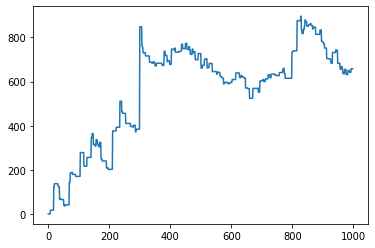

In [8]:
# visualize the behavior for one random episode
bars_per_episode = 1000

env = TradingEnv(input_source, to_predict,
                 winlen=winlen, bars_per_episode=bars_per_episode, traded_amt=traded_amt, initial_balance=initial_balance,
                 commission=commission, slippage=slippage
                 )
env = DummyVecEnv([lambda: env])


nstate = model.initial_state  # get the initial state vector for the reccurent network
#dones = np.zeros(nstate.shape[0])  # set all environment to not done
nstate=None

observation = env.envs[0].reset()#env.reset()
done = False
navs = []
acts = []
for i in tqdm(range(bars_per_episode)):
    action, nstate = model.predict([observation], state=nstate)
    acts.append(action)
    observation, reward, done, info = env.envs[0].step(action)#env.step(action)
    if done:
        break
    navs.append(env.get_attr('balance')[0])


kl = []
t = 0
for n in np.diff(np.vstack(navs).reshape(-1)):
    t = t + n
    kl.append(t)
plot(kl);

In [9]:
# calculate the likelihood of success for any given episode
try:
    l = 100000

    krl = []
    p = pb.ProgressBar(max_value=l)
    for i in range(l):
        p.update(i)
        observation = env.envs[0].reset()
        done = False
        navs = []
        for i in (range(bars_per_episode)):
            action, nstate = model.predict([observation], state=nstate)
            acts.append(action)
            observation, reward, done, info = env.envs[0].step(action)#env.step(action)
            navs.append(env.get_attr('balance')[0])
        kl = []
        t = 0
        for n in np.diff(np.vstack(navs).reshape(-1)):
            t = t + n
            kl.append(t)
        krl.append(kl[-1])
    p.finish()
except KeyboardInterrupt:
    pass

krl = np.array(krl)
print('Profit likelihood: %3.3f%%' % (100*(sum(krl > 0) / len(krl))))

  1% (1384 of 100000) |                  | Elapsed Time: 0:09:26 ETA:  12:19:51

Profit likelihood: 45.087%


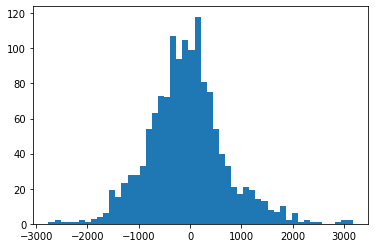

In [11]:
hist(krl, 50);